<a href="https://colab.research.google.com/github/emileeich/STC-510/blob/main/Eich_Module_3_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
crime = pd.read_csv('crimestat.csv',index_col='INC_NUMBER')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
crime


,OCCURRED_ON,OCCURRED_TO,UCR_CRIME_CATEGORY,100_BLOCK_ADDR,ZIP,PREMISE_TYPE
INC_NUMBER,,,,,,
2.02E+14,11/1/2015 0:00,1/9/2016 0:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE
2.02E+14,11/1/2015 0:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE
2.02E+14,11/1/2015 0:00,11/1/2015 9:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT
2.02E+14,11/1/2015 0:00,11/1/2015 5:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE
2.02E+14,11/1/2015 0:00,11/1/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE
...,...,...,...,...,...,...
202000000000.0,11/17/2017 3:13,11/17/2017 3:20,LARCENY-THEFT,206XX N 31ST DR,85027.0,SINGLE FAMILY HOUSING
202000000000000.0,11/17/2017 3:17,NaN,LARCENY-THEFT,59XX E SHEENA DR,85254.0,CARPORT
202000000000000.0,11/17/2017 3:19,11/17/2017 3:19,DRUG OFFENSE,41XX N 27TH AVE,85017.0,VEHICLE


# *Taking Year from "Occurred On" and creating new column "Year" *

In [4]:
crime['YEAR'] = pd.DatetimeIndex(crime['OCCURRED_ON']).year
crime.head()

,OCCURRED_ON,OCCURRED_TO,UCR_CRIME_CATEGORY,100_BLOCK_ADDR,ZIP,PREMISE_TYPE,YEAR
INC_NUMBER,,,,,,,
2.02E+14,11/1/2015 0:00,1/9/2016 0:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE,2015.0
2.02E+14,11/1/2015 0:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE,2015.0
2.02E+14,11/1/2015 0:00,11/1/2015 9:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT,2015.0
2.02E+14,11/1/2015 0:00,11/1/2015 5:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE,2015.0
2.02E+14,11/1/2015 0:00,11/1/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE,2015.0


In [5]:
crime.nunique()

OCCURRED_ON           83134
OCCURRED_TO           66573
UCR_CRIME_CATEGORY        9
100_BLOCK_ADDR        29254
ZIP                      98
PREMISE_TYPE             93
YEAR                      3
dtype: int64

# *Below: Looking at crime category types*

In [6]:
crime.UCR_CRIME_CATEGORY.unique()

array(['MOTOR VEHICLE THEFT', 'RAPE', 'LARCENY-THEFT', 'DRUG OFFENSE',
       'BURGLARY', 'AGGRAVATED ASSAULT',
       'MURDER AND NON-NEGLIGENT MANSLAUGHTER', 'ROBBERY', 'ARSON'],
      dtype=object)

# *Below: Looking at number of each crime category. Larceny-Theft, Burlgary, and Motor Vehicle Theft identified as top 3 crimes that happened in Phoenix. *

In [7]:
crime.UCR_CRIME_CATEGORY.value_counts()

LARCENY-THEFT                            66216
BURGLARY                                 23646
MOTOR VEHICLE THEFT                      14390
DRUG OFFENSE                              9572
AGGRAVATED ASSAULT                        9305
ROBBERY                                   5640
RAPE                                      1981
ARSON                                      634
MURDER AND NON-NEGLIGENT MANSLAUGHTER      289
Name: UCR_CRIME_CATEGORY, dtype: int64

# *Created a box plot to visualize the number of crimes within each crime category. *

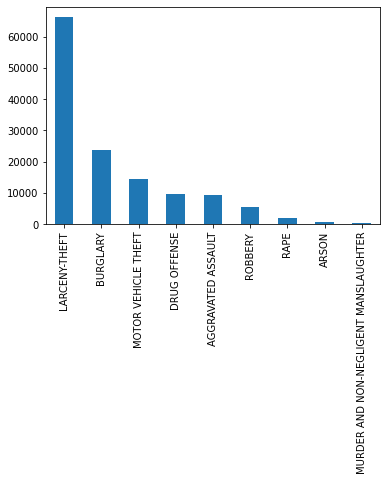

In [8]:
crime.UCR_CRIME_CATEGORY.value_counts().plot.bar()

# *Since Larceny Theft is the top crime in Phoenix, filtered for "Larceny-Theft" crime category*

In [9]:
crime[crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT']

,OCCURRED_ON,OCCURRED_TO,UCR_CRIME_CATEGORY,100_BLOCK_ADDR,ZIP,PREMISE_TYPE,YEAR
INC_NUMBER,,,,,,,
2.02E+14,11/1/2015 0:00,11/1/2015 9:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT,2015.0
2.02E+14,11/1/2015 0:00,3/22/2016 0:36,LARCENY-THEFT,33XX W CAMELBACK RD,85017.0,PARKING LOT,2015.0
2.02E+14,11/1/2015 0:00,NaN,LARCENY-THEFT,279XX N 23RD LN,85085.0,SINGLE FAMILY HOUSE,2015.0
2.02E+14,11/1/2015 0:00,11/11/2015 9:30,LARCENY-THEFT,14XX E HIGHLAND AVE,85014.0,PARKING LOT,2015.0
2.02E+14,11/1/2015 0:01,3/27/2016 8:00,LARCENY-THEFT,202XX N 6TH DR,85027.0,SINGLE FAMILY HOUSE,2015.0
...,...,...,...,...,...,...,...
202000000000000.0,11/17/2017 2:16,NaN,LARCENY-THEFT,72XX W VERDE LN,85033.0,VEHICLE,2017.0
202000000000000.0,11/17/2017 2:35,11/17/2017 2:45,LARCENY-THEFT,12XX W MADISON ST,85007.0,STREET / ROADWAY / ALLEY / SIDEWALK,2017.0
202000000000.0,11/17/2017 3:13,11/17/2017 3:20,LARCENY-THEFT,206XX N 31ST DR,85027.0,SINGLE FAMILY HOUSING,2017.0


# *Grouped larceny theft crimes by location. Identified that the top locations that larceny crimes happen in are at retail businesses, parking lots, and single family houses. *

In [10]:
crime[crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT'].PREMISE_TYPE.value_counts()

RETAIL BUSINESS                        9373
PARKING LOT                            7126
SINGLE FAMILY HOUSE                    6836
APARTMENT                              5517
VEHICLE                                4314
                                       ... 
ATM SEPARATE FROM BANK                    3
GAMBLING FACILITY/CASINO/RACE TRACK       2
PARK AND RIDE                             2
FIELD/WOODS                               2
TRIBAL LANDS                              1
Name: PREMISE_TYPE, Length: 90, dtype: int64

## *Creating new dataframe for Crime Category: Larceny to look at larceny crimes by year*

In [13]:
crimecat = crime.groupby('UCR_CRIME_CATEGORY')

In [14]:
type(crimecat)

pandas.core.groupby.generic.DataFrameGroupBy

In [15]:
crimecat.get_group('LARCENY-THEFT')

,OCCURRED_ON,OCCURRED_TO,UCR_CRIME_CATEGORY,100_BLOCK_ADDR,ZIP,PREMISE_TYPE,YEAR
INC_NUMBER,,,,,,,
2.02E+14,11/1/2015 0:00,11/1/2015 9:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT,2015.0
2.02E+14,11/1/2015 0:00,3/22/2016 0:36,LARCENY-THEFT,33XX W CAMELBACK RD,85017.0,PARKING LOT,2015.0
2.02E+14,11/1/2015 0:00,NaN,LARCENY-THEFT,279XX N 23RD LN,85085.0,SINGLE FAMILY HOUSE,2015.0
2.02E+14,11/1/2015 0:00,11/11/2015 9:30,LARCENY-THEFT,14XX E HIGHLAND AVE,85014.0,PARKING LOT,2015.0
2.02E+14,11/1/2015 0:01,3/27/2016 8:00,LARCENY-THEFT,202XX N 6TH DR,85027.0,SINGLE FAMILY HOUSE,2015.0
...,...,...,...,...,...,...,...
202000000000000.0,11/17/2017 2:16,NaN,LARCENY-THEFT,72XX W VERDE LN,85033.0,VEHICLE,2017.0
202000000000000.0,11/17/2017 2:35,11/17/2017 2:45,LARCENY-THEFT,12XX W MADISON ST,85007.0,STREET / ROADWAY / ALLEY / SIDEWALK,2017.0
202000000000.0,11/17/2017 3:13,11/17/2017 3:20,LARCENY-THEFT,206XX N 31ST DR,85027.0,SINGLE FAMILY HOUSING,2017.0


## *Number of crimes committed each year organized by crime category. * Identified that crime is increasing each year and that there may be data missing from 2015 in the crimestat datafile. -Could investigage further if needed- 

In [22]:
crimecat.YEAR.value_counts()

UCR_CRIME_CATEGORY                     YEAR  
AGGRAVATED ASSAULT                     2017.0     4585
                                       2016.0     4105
                                       2015.0      582
ARSON                                  2017.0      324
                                       2016.0      275
                                       2015.0       33
BURGLARY                               2016.0    11510
                                       2017.0    10078
                                       2015.0     2013
DRUG OFFENSE                           2016.0     4647
                                       2017.0     4292
                                       2015.0      614
LARCENY-THEFT                          2016.0    31821
                                       2017.0    29034
                                       2015.0     5188
MOTOR VEHICLE THEFT                    2016.0     7220
                                       2017.0     5988
                   